In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('./Datasets/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
#Creating a data structure with 60 timesteps and 1 oytput
X_train = []
Y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [6]:
X_train.shape

(1198, 60)

In [7]:
Y_train.shape

(1198,)

In [8]:
# Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
X_train.shape

(1198, 60, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
# Initialising the RNN
regressor = Sequential()

In [13]:
# Adding the first LSTM layer and some Dropout regularisation(to avoid overfitting)
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [14]:
# Compile the RNN
regressor.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [30]:
# Fitting the RNN to the Training set
regressor.fit(X_train, Y_train, epochs= 100, batch_size= 35)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0012
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 9.2790e-04
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011


In [31]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('./Datasets/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.shape

(20, 6)

In [32]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [33]:
dataset_total.shape

(1278,)

In [34]:
dataset_test.shape

(20, 6)

In [35]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [36]:
inputs = inputs.reshape(-1,1)

In [37]:
inputs.shape

(80, 1)

In [38]:
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)

In [39]:
x_test.shape

(20, 60)

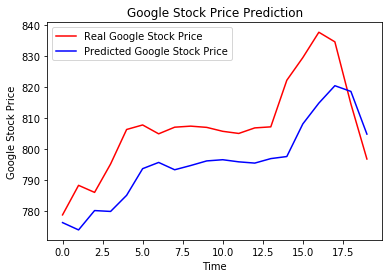

In [40]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the result
plt.plot(real_stock_price, color= 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [43]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

14.076556798810461
